# ML Week1 Assignment Model Solution

## Dataset Description:

The dataset is based on the “hsbdemo Dataset”, High School and Beyond (HS&B) is a study that is part of the Longitudinal Studies Branch (LSB) program This dataset contains information about high school students and their performance (scores) in various curricula such as reading, writing, mathematics, and science. There is also a column about whether them being enrolled in the honors program or not. Using those scores in various subjects, build a classifier of whether a student will be enrolled in the honors program or not. Make sure to use 70-80% of the data for training and the rest for testing. Report your accuracy. Now, do the same with 'prog' as the outcome variable. Here, there are three possibilities for the program: vocation, academic, and general. In other words, you have three classes/labels. Columns of the dataset and their meaning are as follows:

* Id - Student ID

* female- 0:No, 1:Yes

* race - Group 0,1,2,3

* ses - Social Economic Status

* schtype - School type

* prog - program type

* read - The reading score of the student

* Write - The writing score of the student

* math - Student’s Mathematics score

* science -  Student’s science score

* socst - Student’s Social studies score


For our data analysis, we will be using the hsbdemo data set.

The data set contains variables on 200 students. The outcome variable is prog that is program type. The predictor variables are social economic status, ses, a three-level categorical variable and writing score, write, a continuous variable. Categorical Variables in Regression Models. Let’s start with getting some descriptive statistics of the variables of interest.

### 1. Import Libraries 

In [ ]:
import urllib.request
import pandas as pd
import requests
import io
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

### 2. Load the data

In [ ]:

link = "https://stats.idre.ucla.edu/stat/data/hsb2.csv"
webUrl = urllib.request.urlopen(link)
if webUrl.getcode() == 200:
    print("URL read successfully")
else:
    print("URL not read successfully, check url link/internet connection and try again")

URL read successfully


In [ ]:
s = requests.get(link).content
hsb2 = pd.read_csv(io.StringIO(s.decode('utf-8')))

### 3. Display few rows of the data

In [ ]:
hsb2.head()

,id,female,race,ses,schtyp,prog,read,write,math,science,socst
0,70,0,4,1,1,1,57,52,41,47,57
1,121,1,4,2,1,3,68,59,53,63,61
2,86,0,4,3,1,1,44,33,54,58,31
3,141,0,4,3,1,3,63,44,47,53,56
4,172,0,4,2,1,2,47,52,57,53,61


In [ ]:
hsb2.tail()

,id,female,race,ses,schtyp,prog,read,write,math,science,socst
195,31,1,2,2,2,1,55,59,52,42,56
196,145,1,4,2,1,3,42,46,38,36,46
197,187,1,4,2,2,1,57,41,57,55,52
198,118,1,4,2,1,1,55,62,58,58,61
199,137,1,4,3,1,2,63,65,65,53,61


In [ ]:
hsb2.dtypes

id         int64
female     int64
race       int64
ses        int64
schtyp     int64
prog       int64
read       int64
write      int64
math       int64
science    int64
socst      int64
dtype: object

### 4. Convert Race, gender and socio economic status (ses) as categorical variables

In [ ]:
hsb2["race"] = hsb2["race"].astype('category')
hsb2["female"] = hsb2["female"].astype('category')
hsb2["ses"] = hsb2["ses"].astype('category')

In [ ]:
hsb2.dtypes

id            int64
female     category
race       category
ses        category
schtyp        int64
prog          int64
read          int64
write         int64
math          int64
science       int64
socst         int64
dtype: object

## 5. Exploratory data analysis (EDA)

C:\Users\korad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


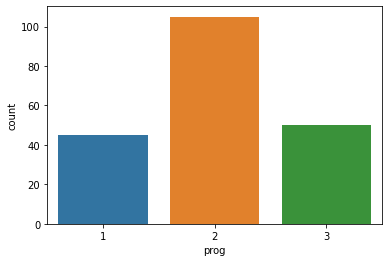

In [ ]:
sns.countplot(hsb2['prog']);

Most of the students have opted for program 2, program 1 and 3 are fairly balanced

C:\Users\korad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


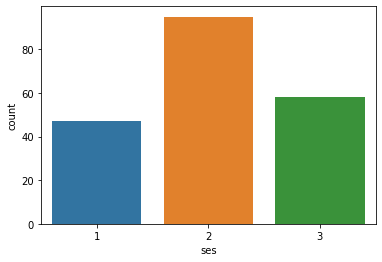

In [ ]:
sns.countplot(hsb2['ses']);

Most of the students are from socio economic status 2, while 1 and 3 are comparable

C:\Users\korad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


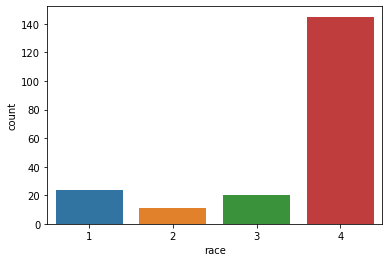

In [ ]:
sns.countplot(hsb2['race']);

Most of the students are from race type 4, while other races are minority

C:\Users\korad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


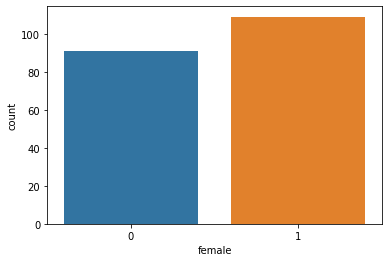

In [ ]:
sns.countplot(hsb2['female']);

Majority of the students are females however there is not too much imbalance between the genders

C:\Users\korad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


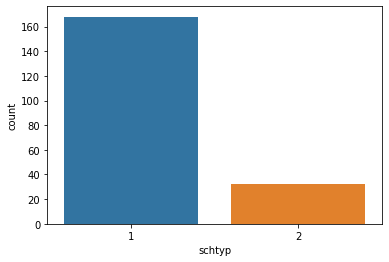

In [ ]:
sns.countplot(hsb2['schtyp']);

Majority of the students are from school type 1 compared to 2

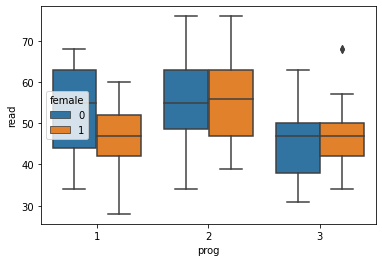

In [ ]:
sns.boxplot(hue=hsb2["female"],y=hsb2["read"],x=hsb2["prog"]);

Females have scored lesser marks than males in read except program 3

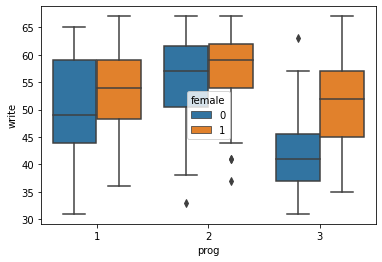

In [ ]:
sns.boxplot(hue=hsb2["female"],y=hsb2["write"],x=hsb2["prog"]);

Females have scored better marks than males in write for all programs

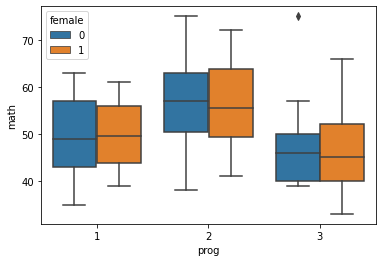

In [ ]:
sns.boxplot(hue=hsb2["female"],y=hsb2["math"],x=hsb2["prog"]);

For maths both genders are almost neck to neck to all the programs

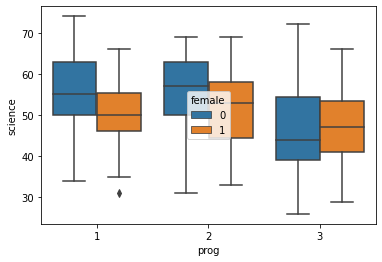

In [ ]:
sns.boxplot(hue=hsb2["female"],y=hsb2["science"],x=hsb2["prog"]);

For science males have in general performed better than females across programs

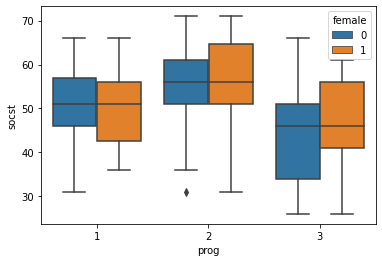

In [ ]:
sns.boxplot(hue=hsb2["female"],y=hsb2["socst"],x=hsb2["prog"]);

For social studies females have performed better than males in program 2 and 3

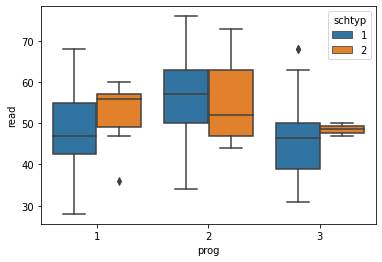

In [ ]:
sns.boxplot(hue=hsb2["schtyp"],y=hsb2["read"],x=hsb2["prog"]);

Students of school type 1 have better read scores for program 2 and 3

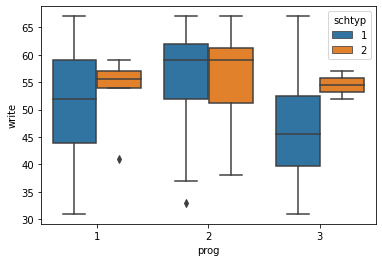

In [ ]:
sns.boxplot(hue=hsb2["schtyp"],y=hsb2["write"],x=hsb2["prog"]);

Students of school type 1 are better performers in program 1 and 2 but not in 3

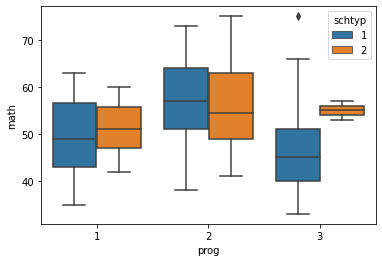

In [ ]:
sns.boxplot(hue=hsb2["schtyp"],y=hsb2["math"],x=hsb2["prog"]);

Student of school type 1 perform well in program 1 and 2 compared to 3 in maths as well

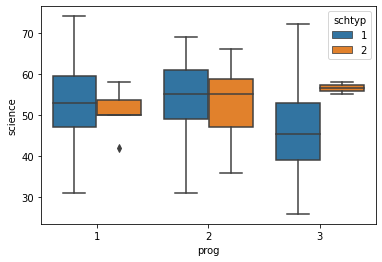

In [ ]:
sns.boxplot(hue=hsb2["schtyp"],y=hsb2["science"],x=hsb2["prog"]);

Student of school type 1 perform well in program 1 and 2 compared to 3 in science as well

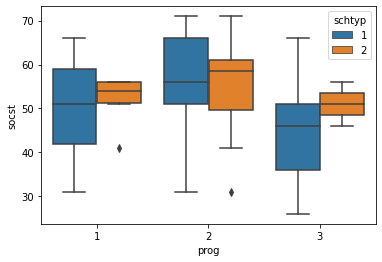

In [ ]:
sns.boxplot(hue=hsb2["schtyp"],y=hsb2["socst"],x=hsb2["prog"]);

Student of school type 1 perform well in program 1 and 2 compared to 3 in social studies as well

TypeError: Categorical is not ordered for operation min
you can use .as_ordered() to change the Categorical to an ordered one


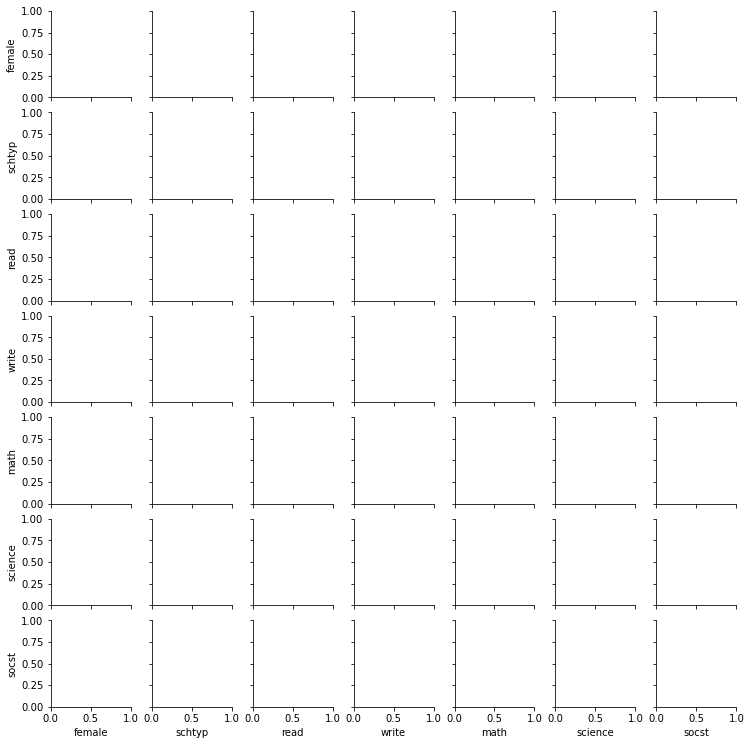

In [ ]:
sns.pairplot(hsb2.drop(['id'],axis=1),hue="prog", diag_kind="hist",markers=["o", "s", "D"], height=1.5);

### 6. Define the dependent and independent variables

In [ ]:
race = pd.get_dummies(hsb2['race'],drop_first=True,prefix='race')
ses = pd.get_dummies(hsb2['ses'],drop_first=True,prefix='ses')
hsb3 = hsb2
hsb3.drop(['race','ses'],axis=1,inplace=True)
hsb3 = pd.concat([hsb3,race,ses],axis=1)

In [ ]:
y = hsb3['prog']
X = hsb3.drop(['prog','id'],axis=1)

### 7. Run the logistic regression

In [ ]:
# define the multinomial logistic regression model with a default penalty
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', 
                           C=1.0, max_iter = 1000000)

# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.605 (0.076)


### 8 Fit the model and predict class for first observation

In [ ]:
result = model.fit(X, y)

In [ ]:
row = X.iloc[0:1, :]

# predict a multinomial probability distribution
yhat = model.predict_proba(row)

# summarize the predicted probabilities
print('Predicted Probabilities: %s' % yhat[0])

Predicted Probabilities: [0.41718569 0.38897304 0.19384126]


In [ ]:
# predict the class label
yhat = model.predict(row)

# summarize the predicted class
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


The predicted program class is one which we know is true from the initial data display

>0.0000 0.557 (0.093)
>0.0001 0.610 (0.072)
>0.0010 0.592 (0.074)
>0.0100 0.588 (0.078)
>0.1000 0.542 (0.096)
>1.0000 0.560 (0.085)


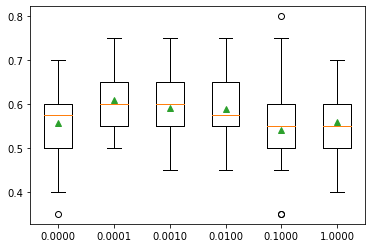

In [ ]:
# get a list of models to evaluate
def get_models():
	models = dict()
	for p in [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0]:
		# create name for model
		key = '%.4f' % p
		# turn off penalty in some cases
		if p == 0.0:
			# no penalty in this case
			models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none')
		else:
			models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=p)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model and collect the scores
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize progress along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show();

We observe that the model accuracy dips with increase in value of C (penalty term). Optimal value of c appears to be 0.0001 as per above box plot

### 9. Print the coefficients and intercept for the model

In [ ]:
print(result.intercept_)
print(result.coef_)

[-0.02104671 -5.29004304  5.31108976]
[[-0.01622072  0.12219527 -0.01746121 -0.00948385 -0.03177674  0.04839655
   0.00935354  0.81129753  0.12930087  0.16119535 -0.4707233  -0.49673442]
 [-0.13477891  0.69522265  0.02577118  0.02240108  0.07292378 -0.05100073
   0.03273081 -0.34477342 -0.10895633 -0.2886737  -0.22284251  0.36205211]
 [ 0.15099963 -0.81741792 -0.00830997 -0.01291723 -0.04114704  0.00260418
  -0.04208435 -0.46652411 -0.02034454  0.12747835  0.69356581  0.13468231]]


In [ ]:
summary = pd.DataFrame(zip(X.columns, np.transpose(result.coef_.tolist()[0])), 
                       columns=['features', 'coef'])

In [ ]:
print(summary)

   features      coef
0    female -0.016221
1    schtyp  0.122195
2      read -0.017461
3     write -0.009484
4      math -0.031777
5   science  0.048397
6     socst  0.009354
7    race_2  0.811298
8    race_3  0.129301
9    race_4  0.161195
10    ses_2 -0.470723
11    ses_3 -0.496734


* A one-unit increase in the variable write is associated with a .005 decrease in the relative log odds of being in program = 0 vs.program = 1.

* A one-unit increase in the variable write is associated with a .010 (0.005*2) decrease in the relative log odds of being in program = 2 vs. program = 1

* The relative log odds of being in program = 0 vs.program = 1 will decrease by 0.47 if moving from the lowest level of ses (ses==1) to the middle level of ses (ses==2) and by 0.49 if moving from the middle level of ses (ses==2) to (ses==3). Here ses stands for socio economic structure